In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%pip install seaborn
import seaborn as sns

data = pd.read_csv('Energy_dataset.csv')
data = data.set_index('Datetime')

# Ensures the index is of the datetime type
data.index = pd.to_datetime(data.index)

# Generates the descriptive statistics
print(data.describe())

             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000


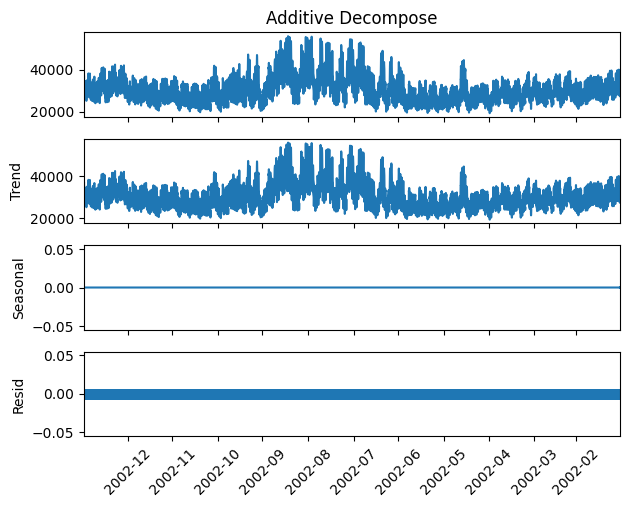

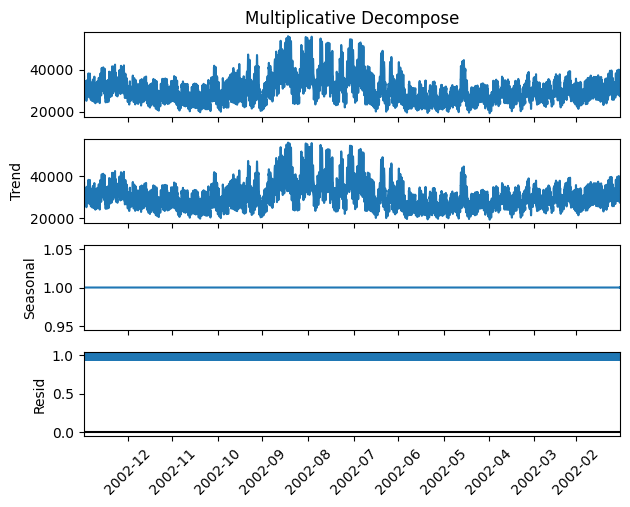

In [27]:
# Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

# Filters the data from the year 2002 and resets the index
data_plot = data[data.index.year == 2002].reset_index()
# Removing any possible duplicate entries and sort by the date
data_plot = data_plot.drop_duplicates(subset = ['Datetime']).sort_values(by = 'Datetime')
data_plot.sort_index(inplace = True)

# Setting the Datetime column as index
data_plot = data_plot.set_index('Datetime')

# Copying the value column for both additive and multiplicative decompose
data_plot['Multiplicative Decompose'] = data_plot['PJME_MW']
data_plot['Additive Decompose'] = data_plot['PJME_MW']

# Perform the additive and multiplicative decompositions
result_add = seasonal_decompose(data_plot['Additive Decompose'], model = 'additive', period = 1)
result_mul = seasonal_decompose(data_plot['Multiplicative Decompose'], model = 'multiplicative', period = 1)

# Plotting the additive and multiplicative decompostions
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)

result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)

plt.show()